<a href="https://colab.research.google.com/github/hoangpanda/colab-algorithm-deploy/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

In [109]:
df = pd.read_csv('linear_regression.csv')
df.columns

Index(['X', 'Y'], dtype='object')

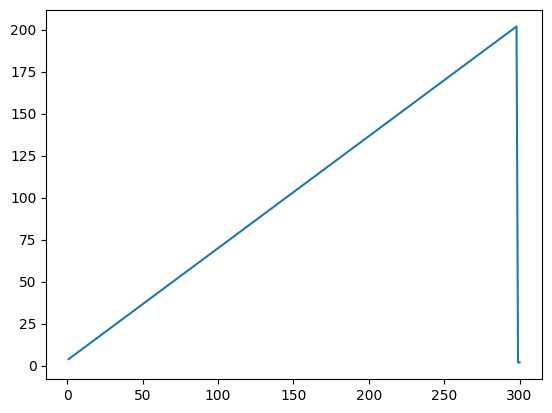

In [110]:
plt.plot(df['X'], df['Y'])

In [111]:
df

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556
...,...,...
295,296,200.555556
296,297,201.222222
297,298,201.888889
298,299,1.888889


In [112]:
df = df.drop(labels=[298, 299], axis=0)

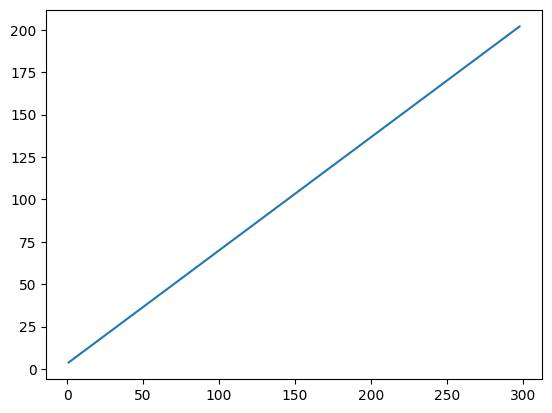

In [113]:
plt.plot(df['X'], df['Y']);

Test với bộ dữ liệu chưa được chuẩn hóa

In [114]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['X']], df[['Y']], test_size=0.33)

In [115]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((199, 1), (99, 1), (199, 1), (99, 1))

In [116]:
from sklearn.linear_model import LinearRegression
mdl = LinearRegression().fit(x_train, y_train)

In [117]:
print(mdl.intercept_)
print(mdl.coef_)

[3.22222222]
[[0.66666667]]


In [118]:
y_pred = mdl.predict(x_test)
y_pred

array([[199.22222224],
       [158.55555557],
       [ 39.22222222],
       [ 78.55555556],
       [165.8888889 ],
       [ 44.55555556],
       [ 17.22222222],
       [ 55.88888889],
       [ 84.55555556],
       [ 88.55555556],
       [121.22222223],
       [ 74.55555556],
       [173.22222223],
       [193.8888889 ],
       [ 53.22222222],
       [ 34.55555556],
       [111.22222223],
       [156.55555557],
       [117.8888889 ],
       [ 38.55555556],
       [153.22222223],
       [189.8888889 ],
       [ 21.88888889],
       [  4.55555555],
       [171.22222223],
       [ 76.55555556],
       [185.8888889 ],
       [145.8888889 ],
       [ 35.22222222],
       [127.8888889 ],
       [175.8888889 ],
       [ 33.22222222],
       [201.8888889 ],
       [ 28.55555556],
       [174.55555557],
       [ 79.88888889],
       [ 89.22222223],
       [ 55.22222222],
       [135.8888889 ],
       [135.22222223],
       [118.55555556],
       [ 40.55555556],
       [ 91.88888889],
       [143

In [119]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse)
print(r2)

3.2806422338130956e-16
1.0


In [120]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(x_train)
x_train_sc = sc.transform(x_train)
x_test_sc = sc.transform(x_test)

Text(0.5, 0, 'x test sc')

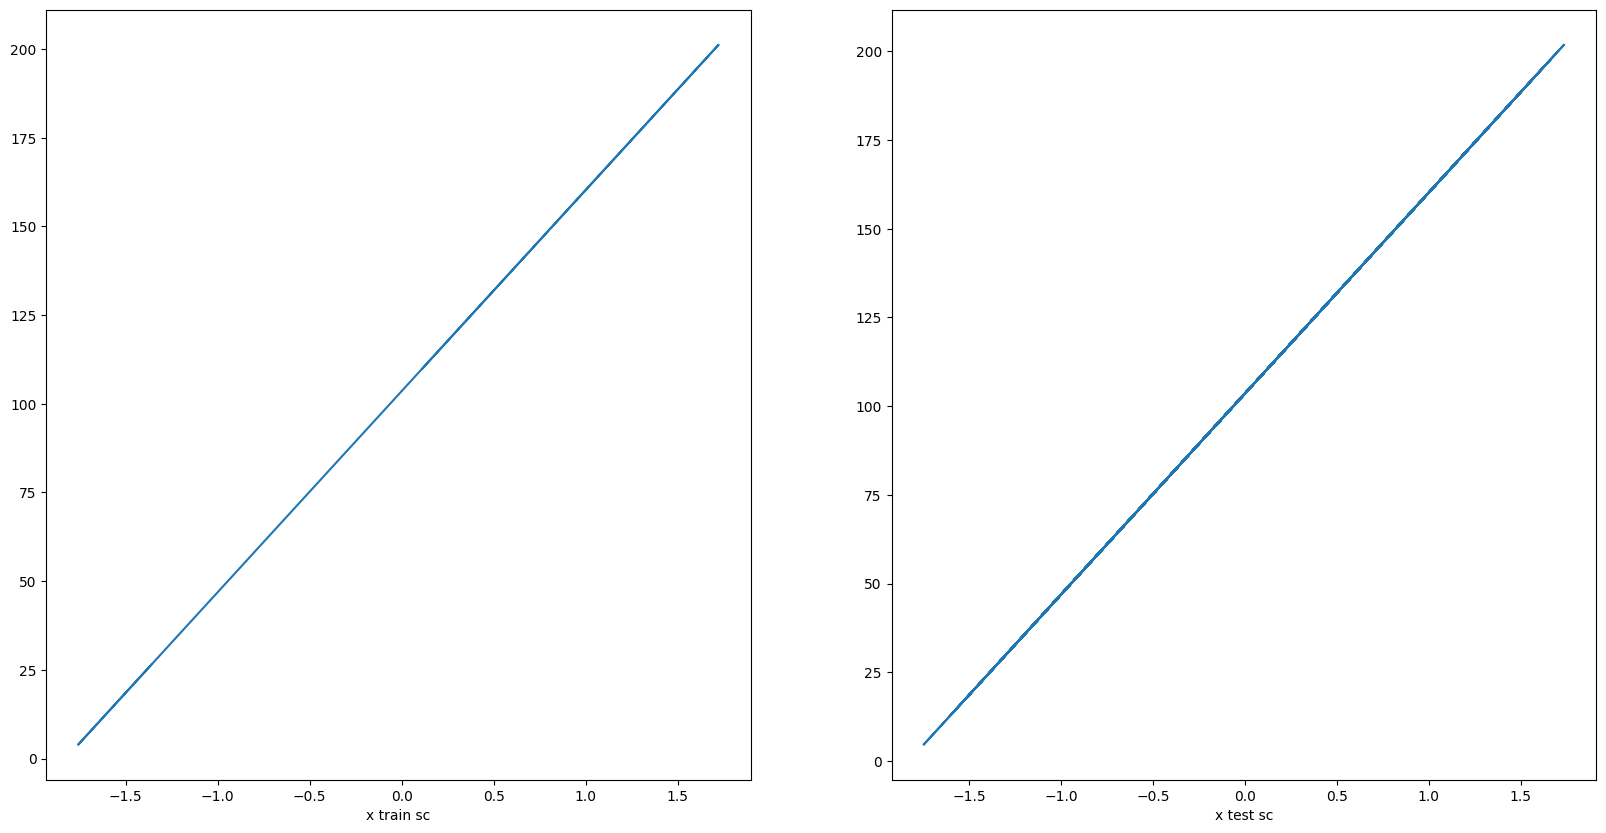

In [121]:
import numpy as np

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(x_train_sc, y_train)
plt.xlabel('x train sc')

plt.subplot(122)
plt.plot(x_test_sc, y_test)
plt.xlabel('x test sc')

In [122]:
mdl1 = LinearRegression()
mdl1.fit(x_train_sc, y_train)
y_pred_sc = mdl1.predict(x_test_sc)
print(mean_squared_error(y_pred_sc, y_test))
print(r2_score(y_pred_sc, y_test))

3.2806416346063536e-16
1.0


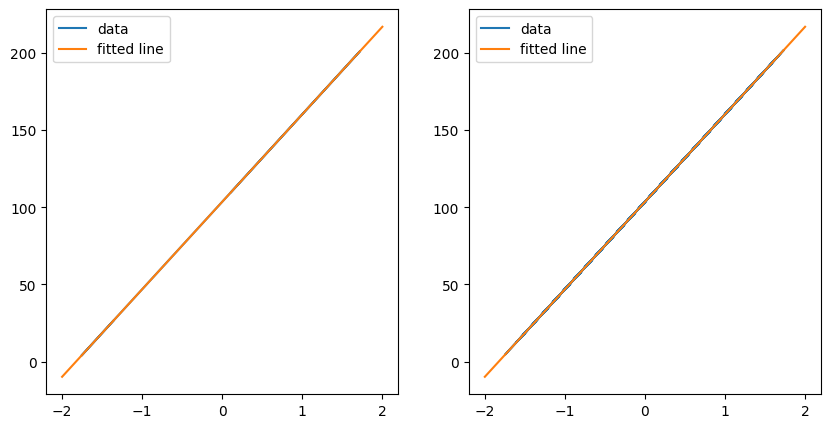

In [125]:
w0 = mdl1.intercept_
w1 = mdl1.coef_[0]

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(x_train_sc, y_train, label='data')
xx = np.linspace(-2, 2, 100)
yy = xx*w1 + w0
plt.plot(xx, yy, label='fitted line')
plt.legend()

plt.subplot(122)
plt.plot(x_test_sc, y_test, label='data')
plt.plot(xx, yy, label='fitted line')

plt.legend()

In [124]:
mse = mean_squared_error(mdl1.predict(x_train_sc), y_train)
r2 = r2_score(mdl1.predict(x_train_sc), y_train)
print(mse)
print(r2)

4.21560589948863e-16
1.0


In [126]:
mse = mean_squared_error(mdl1.predict(x_test_sc), y_test)
r2 = r2_score(mdl1.predict(x_test_sc), y_test)
print(mse)
print(r2)

3.2806416346063536e-16
1.0
